In [2]:
import re

bfs_file = "/Users/sakshmenon/Desktop/PLM/Workflow Gen/Similarity Search/s_cerevisiae2s_pombe.bfs.k30.txt"

def extract_query_and_matches(text):
    text = text.split('\n')[:-1]
    query = text[0].split('\t')[1:]
    top_matches = text[1:]

    return {
        "Query": query,
        "Matches": [{"Score": match.split('\t')[1], "Protein ID": match.split('\t')[2][1:]} for match in top_matches]
    }

match_list = []
with open(bfs_file) as file_obj:
    content = file_obj.read()
    queries = content.split('\n\n')
    for query in queries[1:-1]:
        result = extract_query_and_matches(query)
        match_list.append(result)


In [3]:
def compute_score_differences(query_list, num_matches):
    result = []
    
    for query in query_list:
        query_id = query['Query']
        matches = query['Matches']

        scores = [float(match['Score']) for match in matches[:num_matches+1]]
        
        # Extract the top match score
        top_score = float(matches[0]['Score'])/max(scores)
        p_id = matches[0]['Protein ID']
        
        # Compute the difference for the given number of matches
        placeholder = {query_id[0] : {
            "Top Protein ID": p_id,
            "Top Score": scores[0],
            "Normalized Top Score": round(float(top_score),6)}
        }

        match_score = float(matches[1]['Score'])/max(scores)
        placeholder[query_id[0]]["Match 2 Score"] = scores[1]
        placeholder[query_id[0]]["Match 2 Normalized Score"] = round(top_score - match_score,6)
        placeholder[query_id[0]]["Match 2 Protein ID"] = matches[1]['Protein ID']
        placeholder[query_id[0]]["Confidence Score (%)"] = round((1 - (top_score/match_score))*100, 6)
        
        result.append(placeholder)

    ranks = [[[*result[res].values()][0]['Confidence Score (%)'], res] for res in range(0, len(result))]
    sorted_values = []
    ranks.sort()
    ranks.reverse()
    for rank in ranks:
        sorted_values.append(result[rank[1]])

    return sorted_values, ranks

# Compute differences for the top 3 matches
num_matches_to_compare = 1
result, ranks = compute_score_differences(match_list, num_matches_to_compare)

In [ ]:
def compute_score_differences(query_list, num_matches):
    result = []
    
    for query in query_list:
        query_id = query['Query']
        matches = query['Matches']

        scores = [float(match['Score']) for match in matches[:num_matches+1]]
        
        # Extract the top match score
        top_score = float(matches[0]['Score'])
        p_id = matches[0]['Protein ID']

        # Compute the difference for the given number of matches
        placeholder = {query_id[0] : {
            "Top Protein ID": p_id,
            "Top Score": scores[0],
            "Normalized Top Score": round(float(top_score),6)}
        }
        
        match_score = float(matches[1]['Score'])/max(scores)
        placeholder[query_id[0]]["Match 2 Score"] = scores[1]
        placeholder[query_id[0]]["Match 2 Normalized Score"] = round(top_score - match_score,6)
        placeholder[query_id[0]]["Match 2 Protein ID"] = matches[1]['Protein ID']
        placeholder[query_id[0]]["Confidence Score (%)"] = round((1 - (top_score/match_score))*100, 6)
        
        result.append(placeholder)

    ranks = [[[*result[res].values()][0]['Confidence Score (%)'], res] for res in range(0, len(result))]
    sorted_values = []
    ranks.sort()
    ranks.reverse()
    for rank in ranks:
        sorted_values.append(result[rank[1]])

    return sorted_values, ranks

# Compute differences for the top 3 matches
num_matches_to_compare = 1
result, ranks = compute_score_differences(match_list, num_matches_to_compare)

In [4]:
    # Score Gap Analysis: 
    #     Measure the gap between the top similarity score and the next few scores. 
    #     A large gap between the highest similarity score and the others suggests that the top hit is likely more significant.

import json

# all queries

json_object = json.dumps(result, indent=4)

with open("score_gap_2_all.json", "w") as outfile:
	outfile.write(json_object)

# 30 sampled queries

sampled_results = result[:10] + result[int(len(result)/2) : int(len(result)/2) + 10]+ result[-10:]

json_object = json.dumps(sampled_results, indent=4)

with open("score_gap_2_sampled.json", "w") as outfile:
	outfile.write(json_object)

/var/folders/h3/pl4_4z116_dcntldrzwpn49w0000gn/T/ipykernel_41799/2276607468.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='purple', ax=axes[0])


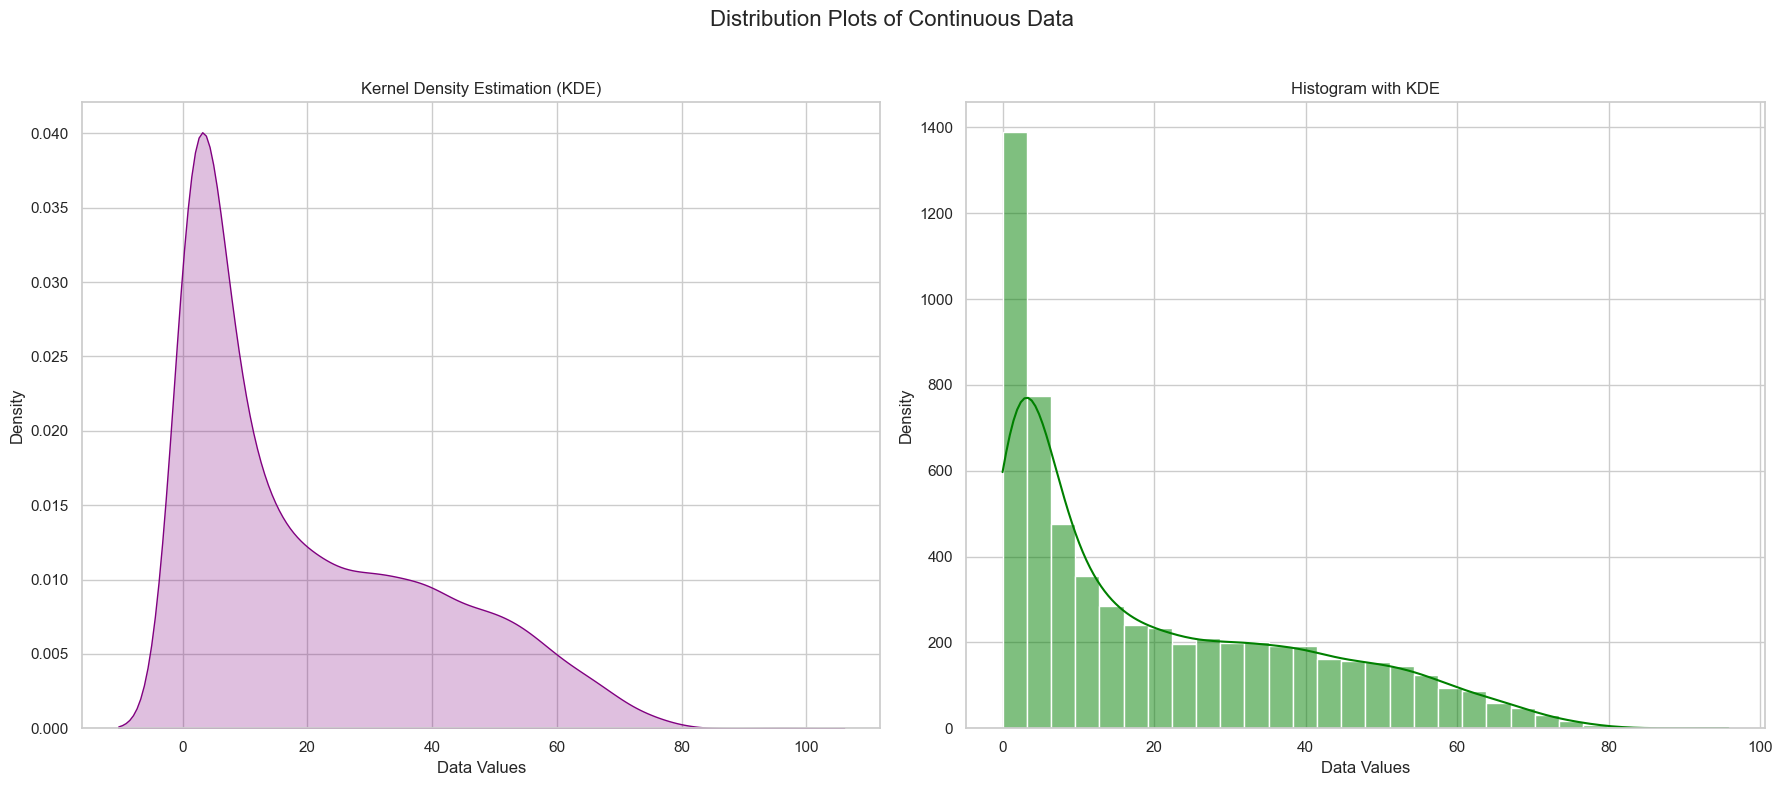

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate some sample continuous data
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=500)  # Normally distributed data

def plot_distribution(data):
    # Set the style for better aesthetics
    sns.set(style="whitegrid")

    # Create a figure and axes for the subplots
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # KDE Plot
    sns.kdeplot(data, shade=True, color='purple', ax=axes[0])
    axes[0].set_title('Kernel Density Estimation (KDE)')
    axes[0].set_xlabel('Data Values')
    axes[0].set_ylabel('Density')

    # Histogram with KDE overlay
    sns.histplot(data, bins=30, kde=True, color='green', ax=axes[1])
    axes[1].set_title('Histogram with KDE')
    axes[1].set_xlabel('Data Values')
    axes[1].set_ylabel('Density')

    # Display the plots
    plt.suptitle('Distribution Plots of Continuous Data', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
    plt.show()

# Call the function to create and display the plots
data = [i[0] for i in ranks]
plot_distribution(data)
